In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Import package

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# 2.Đọc dữ liệu và thống kê mô tả

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv", index_col=0)
print(train.shape)
train.head()

(600000, 14)


,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
ID,,,,,,,,,,,,,,
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


Đây là bộ dữ liệu về thông tin sức khỏe của 600000 người khác nhau.
Bộ dữ liệu gồm 14 biến đầu vào và 1 biến mục tiêu. Trong đó có 6 biến numeric và 7 biến category, 1 biến mục tiêu là class. 
Nội dung của các biến như sau:
1. ID: Số ID , duy nhất với mỗi người
2. age: tuổi(numeric)
3. sex: giới tính(cate) (1 = male, 0 = female)
4. chest: mức độ đau ngực(numeric):chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
5. resting_blood_pressure: huyết áp(numeric):resting blood pressure (in mm Hg on admission to the hospital)
6. serum_cholestoral(numeric):chol - serum cholestoral in mg/dl
7. fasting_blood_sugar(cate):fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
8. resting electrocardiographic results: resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)(cate) 
9. maximum heart rate achieved(numeric)
10.  exercise induced angina: đau thắt ngực do hoạt động thể dục( cate)
11. oldpeak: ST depression induced by exercise relative to rest(numeric)
12. the slope of the peak exercise ST segment: (1 = upsloping; 2 = flat; 3 = downsloping)(cate)
13. number of major vessels (0-3) colored by flourosopy
14. thal: thal - 3 = normal; 6 = fixed defect; 7 = reversable defect(cate)
15. class: biến mục tiêu phân loại (0 = no, 1 = yes)

In [ ]:
train.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,54.426085,0.677447,3.170247,131.340485,249.592420,0.150757,1.020148,149.592069,0.333502,1.051391,1.596033,0.681303,4.711378,0.444185
std,9.086041,0.467454,0.949618,17.842450,51.699976,0.357812,0.994204,23.072593,0.471464,1.144288,0.629821,0.950669,1.934766,0.496875
min,26.061695,0.000000,-0.538498,82.918527,98.326263,0.000000,0.000000,61.844168,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,48.078493,0.000000,3.000000,119.924094,216.475964,0.000000,0.000000,135.704237,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.133425,1.000000,3.000000,129.727941,244.233699,0.000000,2.000000,153.224828,0.000000,0.811101,2.000000,0.000000,3.000000,0.000000
75%,60.663775,1.000000,4.000000,139.915216,274.345453,0.000000,2.000000,165.165497,1.000000,1.674081,2.000000,1.000000,7.000000,1.000000
max,79.591647,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.803372,3.000000,3.000000,7.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   600000 non-null  float64
 1   sex                                   600000 non-null  int64  
 2   chest                                 600000 non-null  float64
 3   resting_blood_pressure                600000 non-null  float64
 4   serum_cholestoral                     600000 non-null  float64
 5   fasting_blood_sugar                   600000 non-null  int64  
 6   resting_electrocardiographic_results  600000 non-null  int64  
 7   maximum_heart_rate_achieved           600000 non-null  float64
 8   exercise_induced_angina               600000 non-null  int64  
 9   oldpeak                               600000 non-null  float64
 10  slope                                 600000 non-null  int64  
 11  

Bộ dữ liệu không có missing value

In [ ]:
train[['age','chest','resting_blood_pressure','serum_cholestoral','maximum_heart_rate_achieved','oldpeak']] = train[['age','chest','resting_blood_pressure','serum_cholestoral','maximum_heart_rate_achieved','oldpeak']].apply(lambda x: round(x,2))
train

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
ID,,,,,,,,,,,,,,
0,49.21,0,4.00,163.00,181.11,0,0,148.23,1,0.94,2,0,3,1
1,53.63,1,1.74,130.23,276.47,0,2,152.92,0,0.12,2,0,3,0
2,49.59,1,4.00,147.00,223.30,1,2,102.35,1,1.62,2,2,7,1
3,58.99,1,4.00,112.37,187.25,0,0,158.16,1,0.00,1,1,7,1
4,51.05,1,1.95,138.03,238.48,0,0,172.54,0,1.15,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,47.83,1,4.00,118.42,300.88,0,2,161.83,1,3.15,2,2,7,1
599996,42.11,1,3.00,106.11,271.72,0,2,178.75,1,1.93,2,0,7,1
599997,41.58,1,1.30,128.90,279.30,0,0,175.87,1,0.00,1,0,7,0


# 3.Visualize distribution

number of numeric field:  6


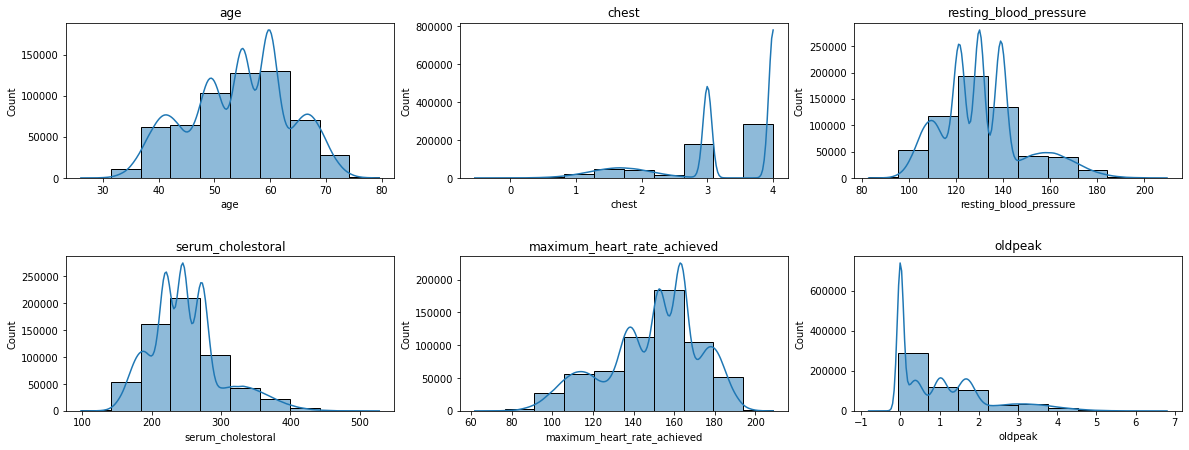

In [ ]:
#Đối với biến liên tục
numeric_cols = train.select_dtypes(include=['float']).columns

def _plot_numeric_classes(col, bins=5, kde=True):
    sns.histplot(train[col],
                 bins = bins,
                 kde = kde)

def _distribution_numeric(numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):

    print('number of numeric field: ', len(numeric_cols)) 
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        break

_distribution_numeric(numeric_cols, row=5, col=3, figsize=(20, 20), bins = 10)

1) age: Có hơn 80% người ở độ tuổi khoảng 38-> 67 

2) serum_cholestoral, maximum_heart_rate_achieve lần lượt dao động trong các khoảng 190->310 và 135->180 là chủ yếu

number of category field:  8


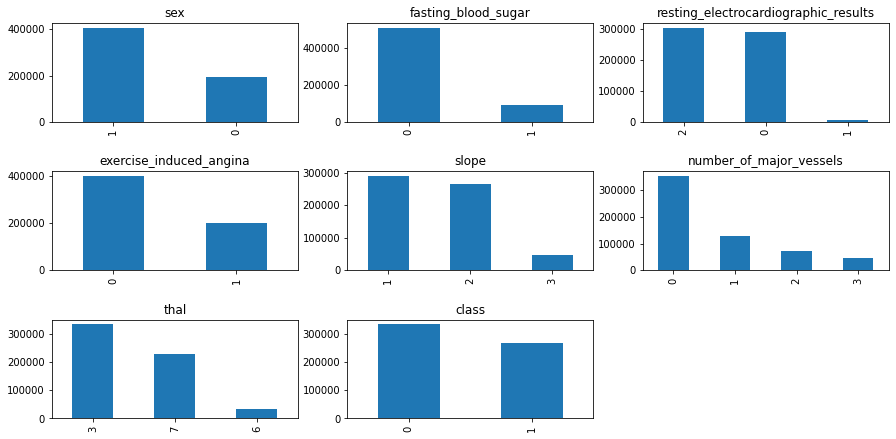

In [ ]:
#Đối với biến phân loại
cate_cols = train.select_dtypes(include=['int']).columns

def _plot_bar_classes(cate_cols):
  train[cate_cols].value_counts().plot.bar(figsize=(15,10))

def _distribution_cate(cate_cols, row , col , figsize = (20, 15)):

  print('number of category field: ', len(cate_cols)) 

  plt.figure(figsize = figsize) 
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)   
  for i in range(1, len(cate_cols)+1, 1):
    try:
      plt.subplot(row, col, i)
      _plot_bar_classes(cate_cols[i-1])
      plt.title(cate_cols[i-1])
    except:
      break

_distribution_cate(cate_cols, row = 4, col = 3, figsize = (20, 15))

1) Male và  exercise_induced_angina là 0 chiếm 2/3 

2) Number_of_major_vessels và thal giảm đều theo thứ tự tương ứng là 0->1->2->3 và 3->7->6 

3) fasting_blood_sugar và resting_electrocardiographic_results đều có chỉ số 1 là thấp nhất, các chỉ số còn lại cao hơn hẳn.

# 4.Kiểm tra outlier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


number of field:  6


<Figure size 1440x1440 with 0 Axes>

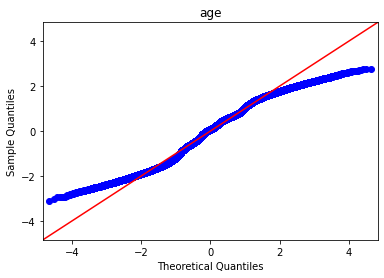

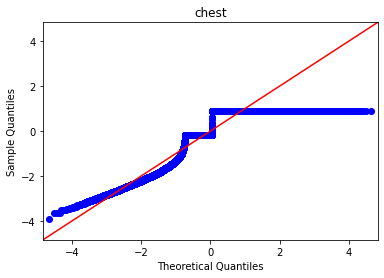

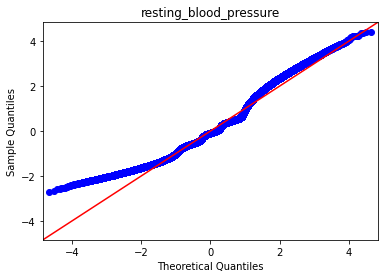

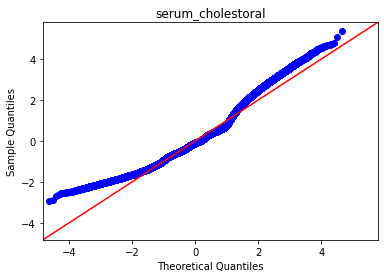

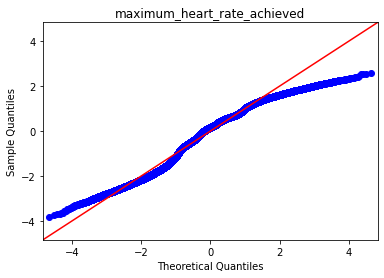

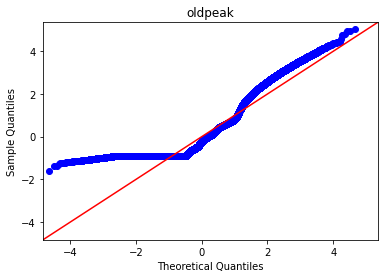

In [ ]:
import statsmodels.api as sm

def _plot_QQ(col):
    sm.qqplot(train[~train[col].isna()][col], fit=True, line='45')
  
def _plot_QQ_all(column, row=3, col=3, figsize=(20, 15)):

    print('number of field: ', len(column))
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(column)+1, 1):
      try:
        # plt.subplot(row, col, i)
        _plot_QQ(column[i-1])
        plt.title(column[i-1])
      except:
        break

_plot_QQ_all(numeric_cols, row=5, col=3, figsize=(20, 20))

Nhận thấy các feature trên đều có outlier nên ta sẽ Chuấn hóa về khoảng 3 sigma !

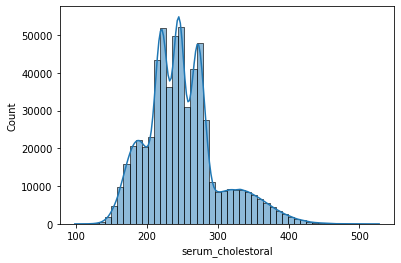

In [ ]:
sns.histplot(train['serum_cholestoral'], kde=True, bins=50)
# sns.histplot(train['resting_blood_pressure'], kde=True, bins=50)

min:  98.33
max:  527.76
Lower_limit:  94.49264815985288
Upper_limit:  404.69219087347085


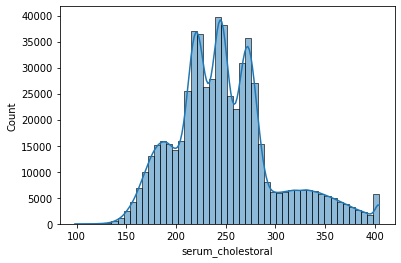

In [ ]:
def _clip_3sigma(x):
  mean = np.mean(x)
  sigma = np.std(x)
  print('min: ',x.min())
  print('max: ',x.max())

  min_3sigma = mean - 3*sigma
  max_3sigma = mean + 3*sigma
  print('Lower_limit: ',min_3sigma)
  print('Upper_limit: ',max_3sigma)

  x = np.clip(x, min_3sigma, max_3sigma)
  return x

train['serum_cholestoral'] = _clip_3sigma(train['serum_cholestoral'])
sns.histplot(train['serum_cholestoral'], kde=True, bins=50)

# 5.Phân phối của dữ liệu đối với từng class

Biểu đồ tương quan giữa biến đầu vào với biến mục tiêu

number of numeric field:  6


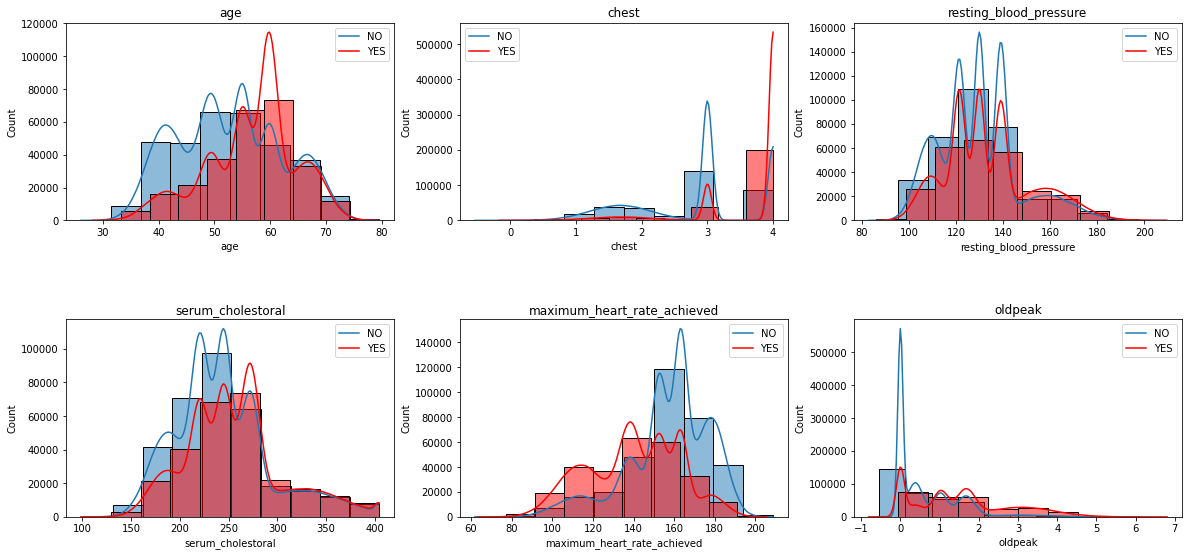

In [ ]:
#Biến liên tục vs biến mục tiêu
numeric_cols = train.select_dtypes(include=['float']).columns

def _plot_numeric_classes(col, bins=10, kde=True):
    sns.histplot(train[col][train['class'] == 0],
                 bins = bins,
                 kde = kde)
    sns.histplot(train[col][train['class'] == 1],
                 bins = bins,
                 kde = kde,color='red')
    plt.legend(['NO', 'YES'])

def _distribution_numeric(numeric_cols, row=3, col=3, figsize=(20, 15), bins = 10):
    
    print('number of numeric field: ', len(numeric_cols))
    
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        break

_distribution_numeric(numeric_cols, row=4, col=3, figsize=(20, 20), bins = 10)

Nhận xét: 

1) age: 30->55 NO cao hơn YES, từ 55 trở đi YES cao hơn NO.

2) chest: -0.5 -> 3.5 NO cao hơn YES, từ 3.5 trở đi YES cao hơn NO.

3) resting_blood_pressure: 90->145 NO cao hơn YES, từ 145 trở đi YES cao hơn NO.

4) serum_cholestoral: 140->250 NO cao hơn YES, từ 250 trở đi YES cao hơn NO.

5) maximum_heart_rate_achieved:80-> 145  YES cao hơn NO, từ 145 trở đi NO cao hơn YES

6) oldpeak: tù -0.5->0.8 NO cao hơn YES, từ 0.8 trở đi YES cao hơn NO

Nhìn chung 6 feature này đều có sức mạnh phân loại khá tốt.

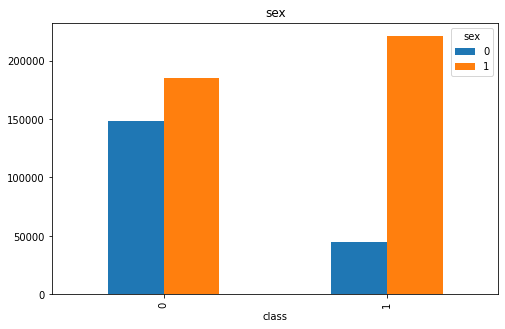

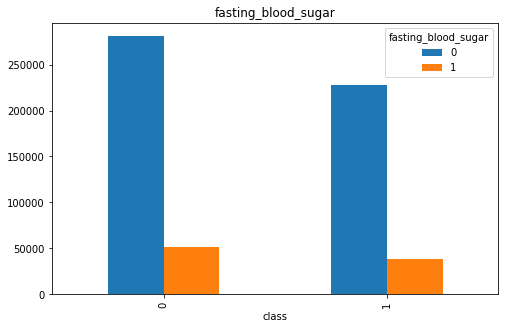

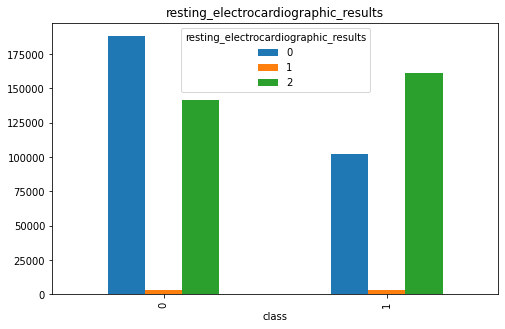

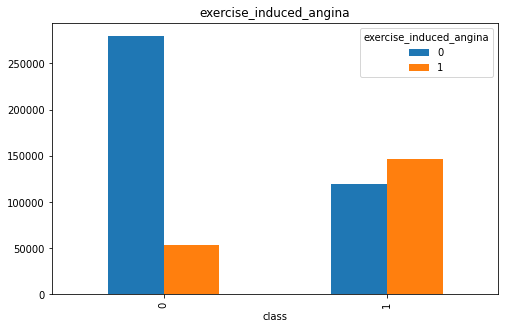

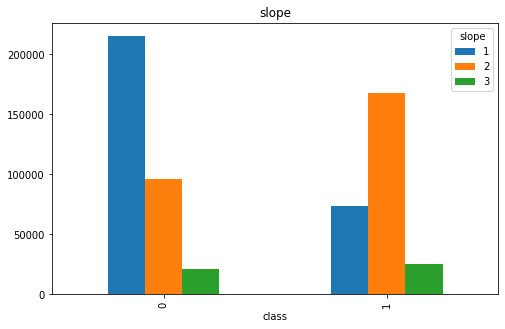

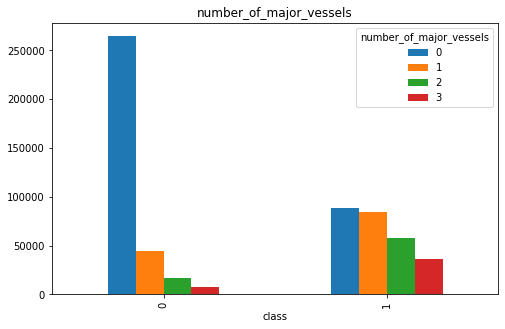

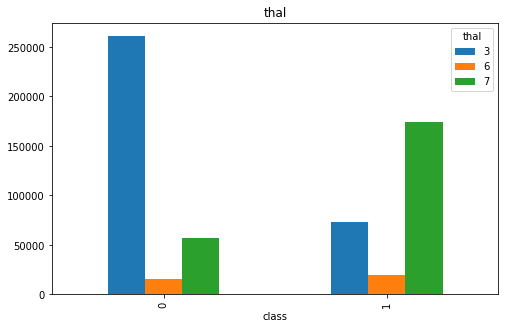

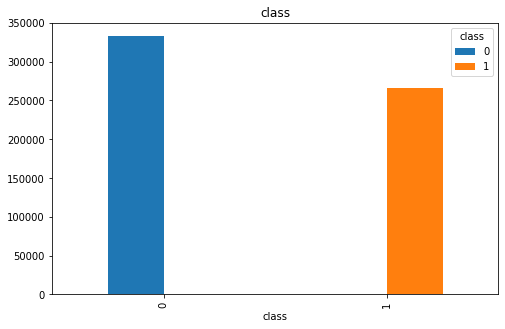

In [ ]:
#Đối với biến phân loại
cate_cols = train.select_dtypes(include=['int']).columns

def _plot_bar_classes(col, figsize=(8, 5)):
    train.groupby('class')[col].value_counts().unstack().plot.bar(figsize=figsize)

for i in range(1, len(cate_cols)+1, 1):
  _plot_bar_classes(cate_cols[i-1])
  plt.title(cate_cols[i-1])

1) sex: male không có sự chênh lệch lớn về bị hay không bị bệnh tim, chủ yếu là chênh lệch ở female

2) fasting_blood_sugar: những người bị và không bị bệnh đều có chỉ số 0 cao hơn hẳn chỉ số 1

3) number_of_major_vessels: những người không bị bệnh thì có chỉ số 0 rất cao

4) resing_electrocardiographic_results và thal đều có chỉ số 1 rất thấp ở cả người bị và không bị bệnh.

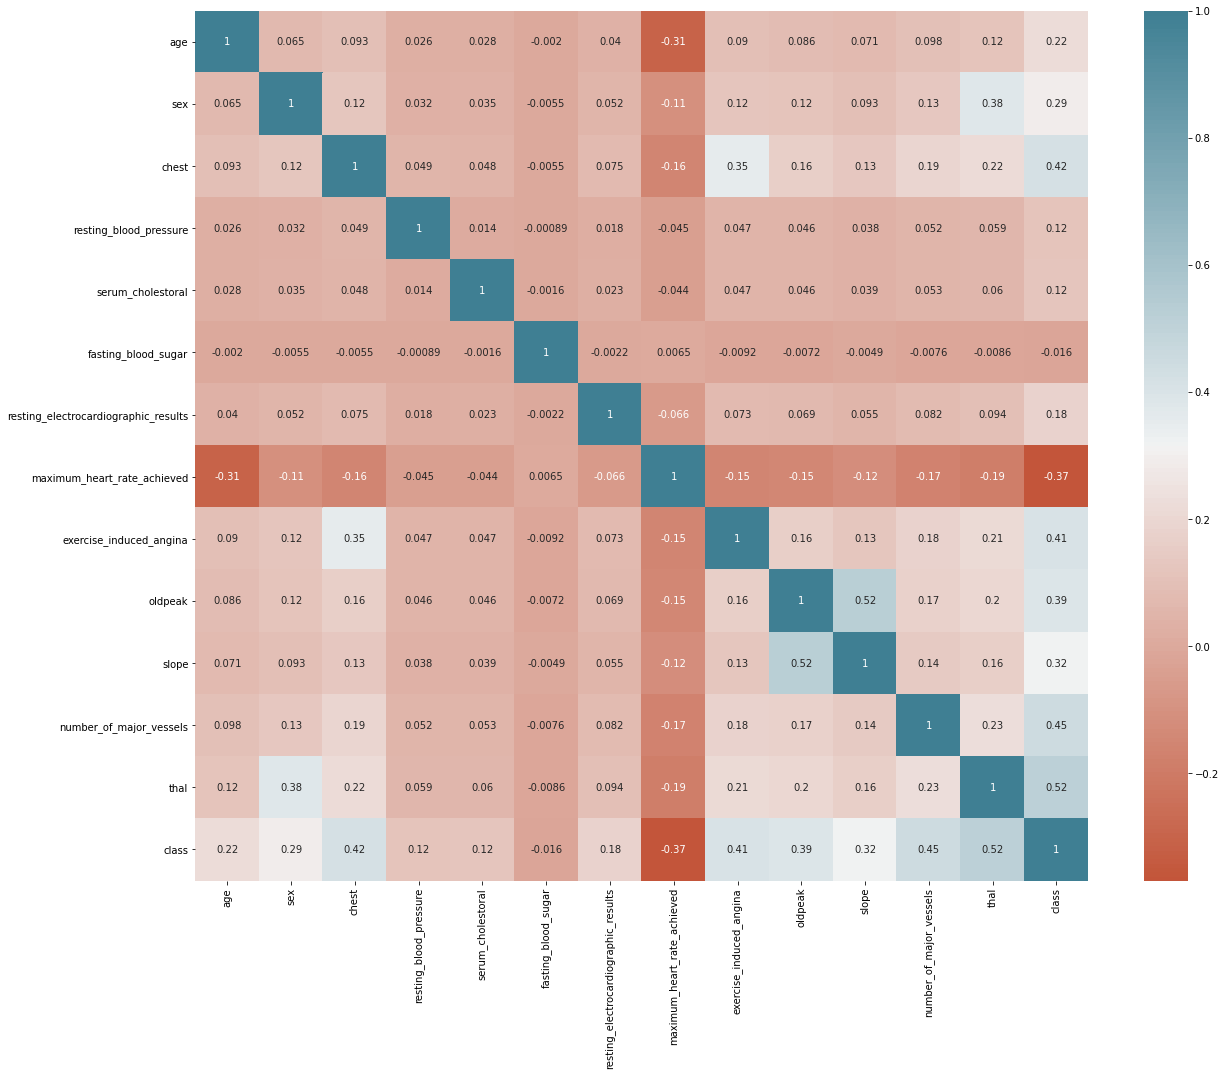

In [ ]:
#Biểu đồ correlation tương quan giữa các biến
plt.figure(figsize=(20, 16))
correlation = train.corr()
sns.heatmap(train.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))

# 6.Phân chia tập train/validation

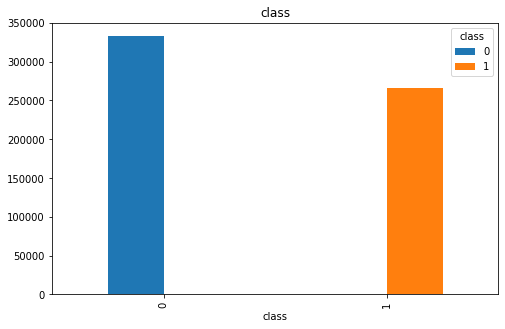

Biến mục tiêu không bị mất cân bằng lớn nên ta dùng thang accuracy để đánh giá

In [ ]:
df_train, df_val = train_test_split(train, stratify = train['class'],test_size=0.2)
X_train = df_train.copy()
y_train = X_train.pop("class")

X_val = df_val.copy()
y_val = X_val.pop("class")
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(480000, 13) (480000,)
(120000, 13) (120000,)


In [ ]:
# Lấy list names của các biến phân loại và biến liên tục.
cat_names = list(X_train.select_dtypes(['int']).columns)
num_names = list(X_train.select_dtypes(['float']).columns)

# 7.Huấn luyện mô hình

Huấn luyện với Hồi quy Logistic (baseline model)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

accuracy_train = accuracy_score(list(y_train), list(y_train_pred))
accuracy_val = accuracy_score(list(y_val), list(y_val_pred))

print('Logistic Regression')
print('accuracy_train: ',round(accuracy_train,4))
print('accuracy_val: ',round(accuracy_val,4))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression
accuracy_train:  0.8716
accuracy_val:  0.8713


Áp dụng với Decision Tree, KNN neighbors, RandomForest

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_1 = DecisionTreeClassifier().fit(X_train, y_train)
y_train_pred_1 = model_1.predict(X_train)
y_val_pred_1 = model_1.predict(X_val)

accuracy_train_1 = accuracy_score(list(y_train), list(y_train_pred_1))
accuracy_val_1 = accuracy_score(list(y_val), list(y_val_pred_1))

print('Decision Tree')
print('accuracy_train_1:', round(accuracy_train_1,4))
print('accuracy_val_1:', round(accuracy_val_1,4))

Decision Tree
accuracy_train_1: 1.0
accuracy_val_1: 0.8504


In [ ]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

model_2 = KNeighborsClassifier().fit(X_train, y_train)
y_train_pred_2 = model_2.predict(X_train)
y_val_pred_2 = model_2.predict(X_val)

accuracy_train_2 = accuracy_score(list(y_train), list(y_train_pred_2))
accuracy_val_2 = accuracy_score(list(y_val), list(y_val_pred_2))

print('KNN')
print('accuracy_train:', round(accuracy_train_2,4))
print('accuracy_val:', round(accuracy_val_2,4))

KNN
accuracy_train: 0.8713
accuracy_val: 0.8131


In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier().fit(X_train, y_train)
y_train_pred_3 = model_3.predict(X_train)
y_val_pred_3 = model_3.predict(X_val)

accuracy_train_3 = accuracy_score(list(y_train), list(y_train_pred_3))
accuracy_val_3 = accuracy_score(list(y_val), list(y_val_pred_3))

print('RandomForestClassifier')
print('accuracy_train:', round(accuracy_train_3,4))
print('accuracy_val:', round(accuracy_val_3,4))

RandomForestClassifier
accuracy_train: 1.0
accuracy_val: 0.8978


Text(0.5, 1.0, 'Scores Metrics Accuracy')

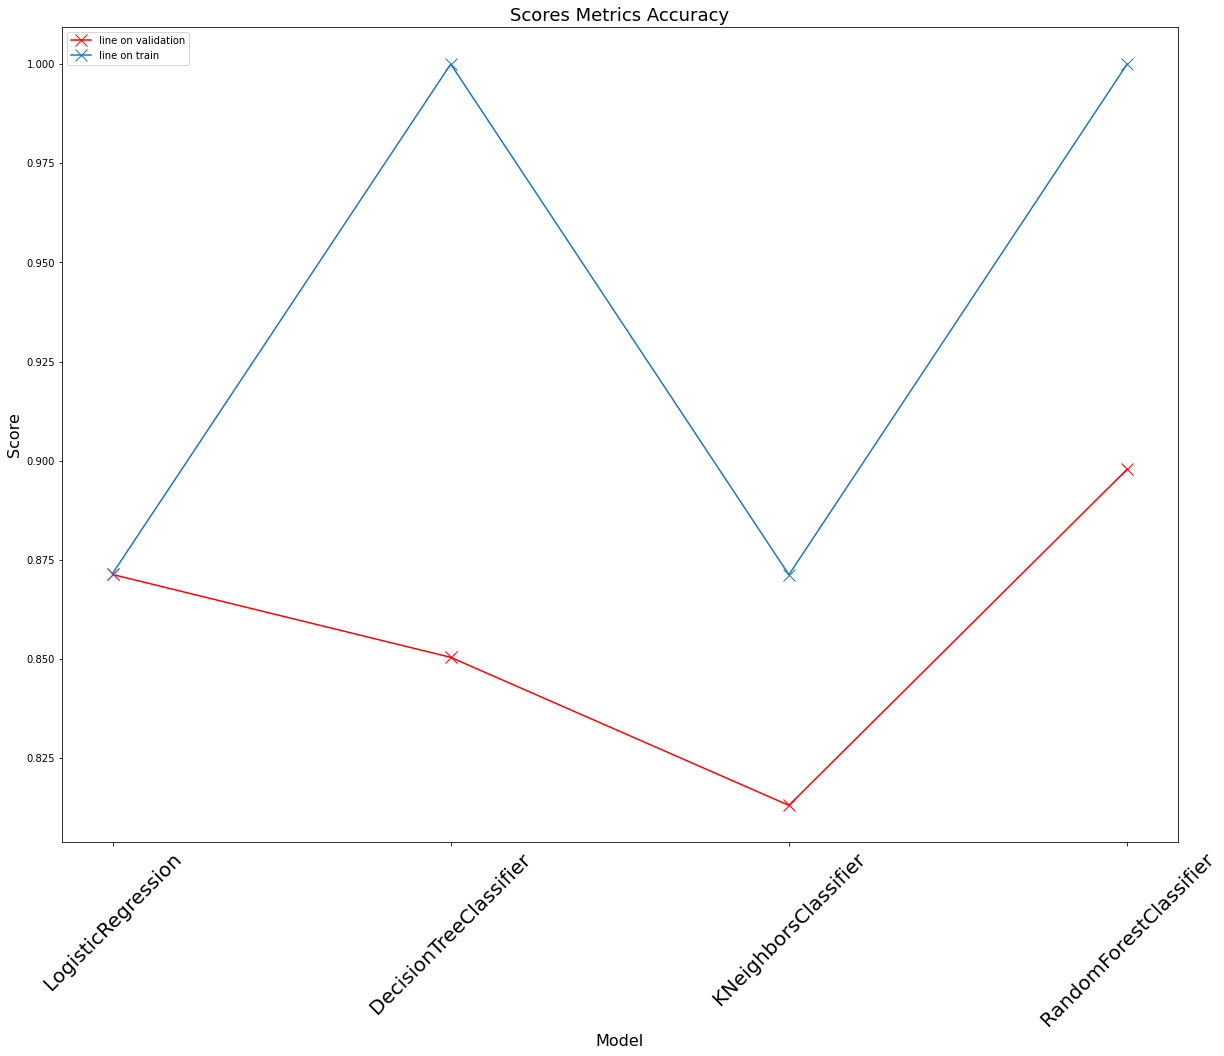

In [ ]:
# Visualize accuracy train và validation
plt.figure(figsize=(20, 15))
all_score_val = [accuracy_val, accuracy_val_1, accuracy_val_2, accuracy_val_3]
all_score_train = [accuracy_train, accuracy_train_1, accuracy_train_2, accuracy_train_3]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier']

plt.plot(np.arange(len(all_score_val))+1, all_score_val, marker='x', markersize=12, color='red')
plt.plot(np.arange(len(all_score_train))+1, all_score_train, marker='x', markersize=12)

plt.legend(['line on validation', 'line on train'])

plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)

plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=20)
plt.title("Scores Metrics Accuracy", fontsize=18)

Dự báo trên tập test
+ Qua 4 mô hình trên ta thấy accuracy trên RandomForestClassifier là cao nhất, tuy nhiên lại bị overfitting. Do đó ta sẽ lựa chọn LogisticRegression cao thứ 2 (do có accuracy trên val và train ko lệch nhiều)

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv',index_col=0)
X_test['class'] = model.predict(X_test)
X_test['class'].to_csv("submission.csv")
X_test

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
ID,,,,,,,,,,,,,,
600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7,1
600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7,1
600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7,0
600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7,0
600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,55.375600,0,3.000000,111.629089,272.110688,0,0,154.583762,0,0.000000,1,0,3,0
999996,53.782685,1,4.000000,102.819138,285.219928,0,2,153.252226,1,0.000000,1,3,7,1
999997,55.530874,0,2.053896,106.656515,210.870682,0,2,152.268989,1,1.719441,2,0,3,0
